# Sanjeev Gupta 
22565025

Question - 1

In [114]:
np.random.seed(26)
mean = np.random.rand(1,10)
mean

array([[0.30793495, 0.51939148, 0.76829766, 0.78922074, 0.87056206,
        0.18792139, 0.26950525, 0.49619214, 0.73912175, 0.19495199]])

In [82]:
import numpy as np
# roll number = 22565015
np.random.seed(26)
bandit_means= np.random.uniform(0,1,10)
bandit_means

array([0.30793495, 0.51939148, 0.76829766, 0.78922074, 0.87056206,
       0.18792139, 0.26950525, 0.49619214, 0.73912175, 0.19495199])

In [83]:
import random
def draw(p):
    if random.random() > p:
        return 0
    else:
        return 1

In [84]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sea

NUM_TRIALS = 100000      

In [123]:
#ucb
import math

def ucb_algo(p, T):  
    ucb = np.zeros(10)
    time = np.zeros(10,dtype=int)
    reward = np.zeros(10,dtype=int)
    emp_r = np.zeros(10)
    E_ucb = []
    for i in range(0,T):
        if max(ucb)==0:
            j = random.choice(np.arange(10))
        else:
            j = ucb.argmax()
        reward[j] += draw(p[j])
        time[j] += 1
        emp_r[j] = reward[j]/time[j]
        y = sum(reward)/(i+1)
        E_ucb.append(y)
        for k in range (0,10):
            ucb[k] = emp_r[k] + math.sqrt(2*np.log(i+1)/time[k])
    return reward,emp_r,time,E_ucb

In [124]:
a,b,c,E_ucb = ucb_algo(bandit_means,NUM_TRIALS)

C:\Users\Sanjeev Gupta\AppData\Local\Temp\ipykernel_14048\1789437851.py:21: RuntimeWarning: invalid value encountered in double_scalars
  ucb[k] = emp_r[k] + math.sqrt(2*np.log(i+1)/time[k])
C:\Users\Sanjeev Gupta\AppData\Local\Temp\ipykernel_14048\1789437851.py:21: RuntimeWarning: divide by zero encountered in double_scalars
  ucb[k] = emp_r[k] + math.sqrt(2*np.log(i+1)/time[k])


In [125]:
print(f"Total reward per arm: {a}\nTotal Pulls of each arm: {c}\nEmpirical reward of each arm: {b}")

Total reward per arm: [   28    55  1010  1374 83346     8    11    65   537    13]
Total Pulls of each arm: [   80   122  1337  1778 95639    46    52   137   754    55]
Empirical reward of each arm: [0.35       0.45081967 0.75542259 0.7727784  0.87146457 0.17391304
 0.21153846 0.47445255 0.71220159 0.23636364]


Text(0, 0.5, 'E(r)')

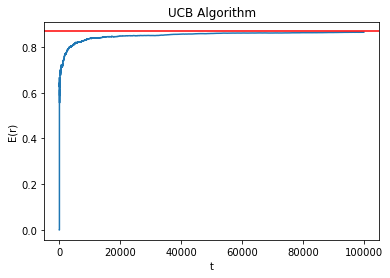

In [127]:
# Plotting expected rewards for ucb algo

plt.plot(np.arange(1,100001),E_ucb)
plt.axhline(y=max(bandit_means),c='r')
plt.title("UCB Algorithm")
plt.xlabel("t")
plt.ylabel("E(r)")

Question - 2

1) When epsilon = 1/(1+count)

In [85]:
def eG3(T,p):
    p_eG3 = np.zeros(10)
    reward = np.zeros(10,dtype=int)
    time = np.zeros(10,dtype=int)
    E_eG3 = []
    count =0
#     ep = 1/(1+count)
    
    
    for i in range(0,T):
        if draw(1/(1+count)) == 1:
            n = np.random.choice(np.arange(10))
            reward[n] += draw(p[n])
            time[n] += 1
            p_eG3[n] = reward[n]/time[n]
            y = sum(reward)/(i+1)
            E_eG3.append(y)
        else:
            n = p_eG3.argmax()
            reward[n] += draw(p[n])
            time[n] += 1
            p_eG3[n] = reward[n]/time[n]
            y = sum(reward)/(i+1)
            E_eG3.append(y)
        count+=1
    

    
    
    print(f"Reward: {reward} \n Probability: {p_eG3} \n Times of arms pull: {time} ")
    
    #Graph
    plt.xlabel("Time")
    plt.ylabel("Expected Reward")
    plt.title('Reward vs Trail')
    plt.axhline(y=max(p_eG3),c='r')
    plt.plot(E_eG3)
    plt.show()

Reward: [    0     2   625 77438     0     0     0     0   558     0] 
 Probability: [0.         0.5        0.74760766 0.78704353 0.         0.
 0.         0.         0.73036649 0.        ] 
 Times of arms pull: [    1     4   836 98391     0     2     1     1   764     0] 


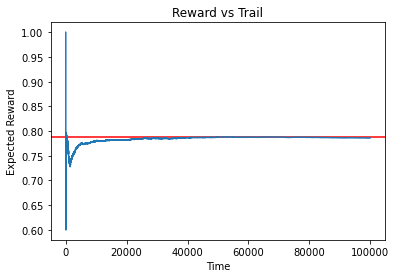

In [86]:
eG3(NUM_TRIALS,bandit_means)

2) When epsilon = 1/(1+(count*count)

In [87]:
def eG3(T,p):
    p_eG3 = np.zeros(10)
    reward = np.zeros(10,dtype=int)
    time = np.zeros(10,dtype=int)
    E_eG3 = []
    count =0
#     ep = 1/(1+count*count)
    
    
    for i in range(0,T):
        if draw(1/(1+count)**2) == 1:
            n = np.random.choice(np.arange(10))
            reward[n] += draw(p[n])
            time[n] += 1
            p_eG3[n] = reward[n]/time[n]
            y = sum(reward)/(i+1)
            E_eG3.append(y)
        else:
            n = p_eG3.argmax()
            reward[n] += draw(p[n])
            time[n] += 1
            p_eG3[n] = reward[n]/time[n]
            y = sum(reward)/(i+1)
            E_eG3.append(y)
        count+=1
    

    
    
    print(f"Reward: {reward} \n Probability: {p_eG3} \n Times of arms pull: {time} ")
    
    #Graph
    plt.xlabel("Time")
    plt.ylabel("Expected Reward")
    plt.title('Reward vs Trail')
    plt.axhline(y=max(p_eG3),c='r')
    plt.plot(E_eG3)
    plt.show()

Reward: [    0     0     0     0 86929     0     0     0     0     0] 
 Probability: [0.      0.      0.      0.      0.86929 0.      0.      0.      0.
 0.     ] 
 Times of arms pull: [     0      0      0      0 100000      0      0      0      0      0] 


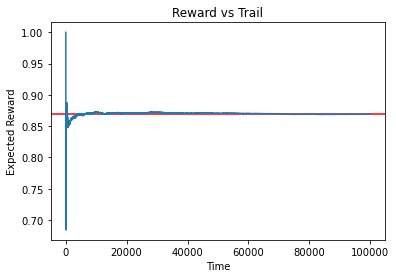

In [88]:
eG3(NUM_TRIALS,bandit_means)